## Importación y carga de todas las librerías necesarias

In [1]:
import matplotlib.pyplot as plt
import face_recognition
import urllib.request
import numpy as np
import warnings
import shutil
import dlib
import bz2
import cv2

from PIL import Image, ImageDraw
from skimage import io

In [2]:
!pip install cmake dlib face-recognition pillow==9.5.0
warnings.filterwarnings("ignore", category = DeprecationWarning)

## Carga del modelo

Para nuestro proyecto final, encontramos que el modelo CNN también se usa para reconocimiento de rostros, por lo cual, decidimos hacer uso del mismo.





In [3]:
cnn_model_url = "http://dlib.net/files/mmod_human_face_detector.dat.bz2" 
archive_path  = "mmod_human_face_detector.dat.bz2"

urllib.request.urlretrieve(cnn_model_url, archive_path) 
with bz2.BZ2File(archive_path, "rb") as file, open("mmod_human_face_detector.dat", "wb") as out_file:
    out_file.write(file.read())

## Reconocimiento de rostros
El reconocimiento de rostros con CNN tiene un funcionamiento muy similar al de HOG, estos son los pasos que realiza:

- Detectar rostros en la imagen. El CNN examina la imagen para localizar áreas que contienen rostros.
- Este modelo identifica la posición y escala de cada rostro en la imagen, delimitando un área alrededor de cada una.
- Una vez detectado el rostro, se realiza un preprocesamiento para normalizar la imagen. Es decir, se escala la imagen a un tamaño estándar, se ajusta el brillo y/o se rota la imagen para centrarla.
- El modelo CNN, mediante capas convolucionales, extrae características relevantes del rostro. (Más adelante se mostrará un ejemplo en una página interactiva muy interesante que encontramos)
- Estas características se representan como un "encoding" que es único para cada rostro.
- Los encodings generados se comparan con los encodings de rostros previamente conocidos. A partir de esto se calculan las distancias de los encodings (Entre más baja la distancia mayor coincidencia con los encodings tomados).
- Finalmente, basado en las comparaciones, el sistema asigna un nombre al rostro detectado o indica que no se encuentra en la imagen.

Para este ejemplo, aprovecharemos las imágenes de Einstein que ya poseemos del reconocimiento de rostros haciendo uso de HOG.

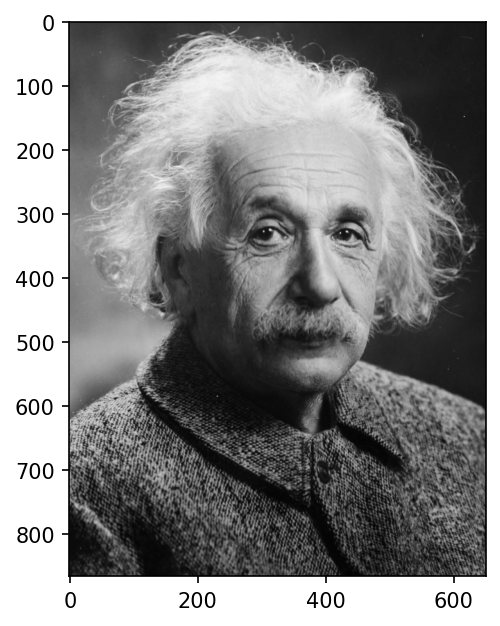

In [4]:
cnn_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
predictor    = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
image        = cv2.imread(r"C:\Users\USUARIO\Downloads\Albert_Einstein_Head.jpg")
escalado     = 20
ancho        = int(image.shape[1] * escalado / 100)
alto         = int(image.shape[0] * escalado / 100)
dim          = (ancho, alto)
image        = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
cv2.imwrite('einstein_scaled.jpg', image)

plt.figure(dpi = 150)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Pruebas del modelo, detección de rostros de perfil

En nuestros procesamientos con HOG (y también con las pruebas realizadas de CNN) descubrimos que estos modelos presentan problemas relevantes a la hora de reconocer rostros que están de perfil, por lo tanto, decidimos entrenar el modelo haciendo uso de fotos de Einstein en las cuáles está de perfil para lograr observar si esto solventaba dicha problemática.

Sin embargo...

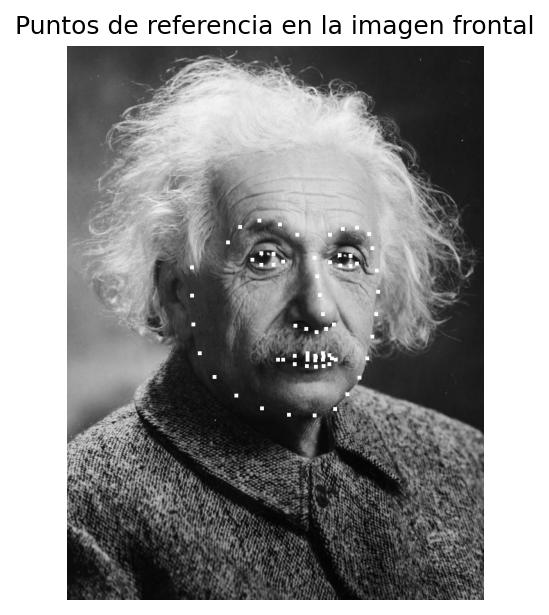

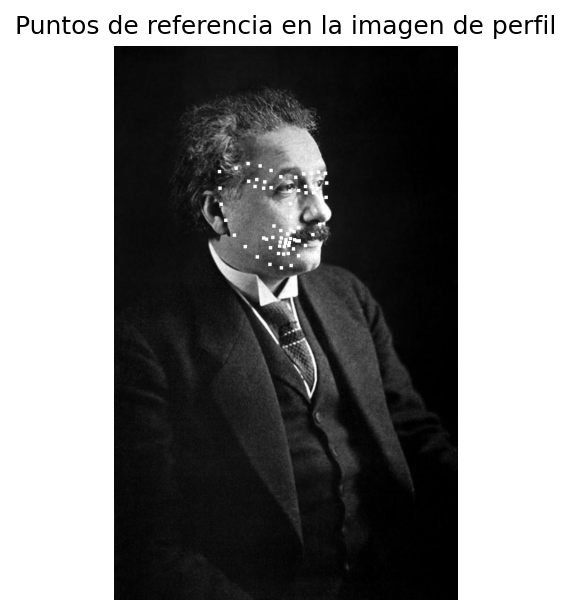

In [5]:
# Encodings
einstein_de_frente       = face_recognition.load_image_file("einstein_scaled.jpg")
einstein_encoding_cara   = face_recognition.face_encodings(einstein_de_frente)[0]
einstein_de_lado         = face_recognition.load_image_file("einstein_profile.jpg")
einstein_encoding_perfil = face_recognition.face_encodings(einstein_de_lado)[0]
encodings_entrenados     = [einstein_encoding_cara, einstein_encoding_perfil]
nombres_rostros          = ["Albert Einstein (frontal)", "Albert Einstein (perfil)"]

nombre_archivo     = 'einstein_scaled.jpg'
imagen             = io.imread(nombre_archivo)
rostros_detectados = cnn_detector(imagen, 1)

for i, rostro in enumerate(rostros_detectados):
    rect      = rostro.rect                     # Posición del rostro
    landmarks = predictor(imagen, rect)         # Los 68 puntos faciales
    for j in range(68):
        imagen[landmarks.part(j).y - 3: landmarks.part(j).y + 3, landmarks.part(j).x - 3: landmarks.part(j).x + 3] = 255

io.imsave('test_cnn_frontal.jpg', imagen)
test_imagen = cv2.imread("test_cnn_frontal.jpg")

plt.figure(dpi = 150)
plt.imshow(cv2.cvtColor(test_imagen, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Puntos de referencia en la imagen frontal")
plt.show()

nombre_archivo     = 'einstein_profile.jpg'
imagen             = io.imread(nombre_archivo)
rostros_detectados = cnn_detector(imagen, 1)

for i, rostro in enumerate(rostros_detectados):
    rect      = rostro.rect                     # Posición del rostro
    landmarks = predictor(imagen, rect)         # Los 68 puntos faciales
    for j in range(68):
        imagen[landmarks.part(j).y - 3: landmarks.part(j).y + 3, landmarks.part(j).x - 3: landmarks.part(j).x + 3] = 255

io.imsave('test_cnn_perfil.jpg', imagen)
test_imagen = cv2.imread("test_cnn_perfil.jpg")

plt.figure(dpi = 150)
plt.imshow(cv2.cvtColor(test_imagen, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Puntos de referencia en la imagen de perfil")
plt.show()

## Carga de los encodings del rostro de Einstein para detección del mismo

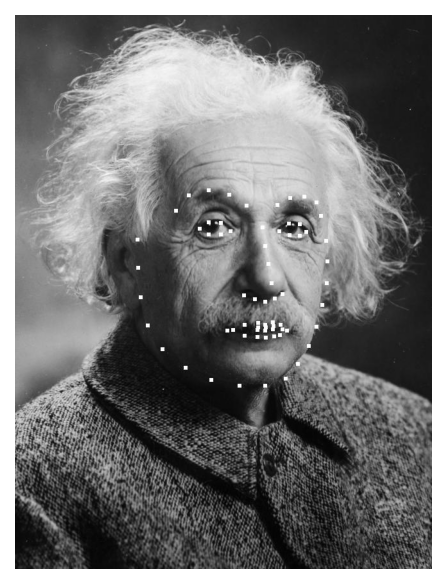

In [6]:
# Encodings
imagen_einstein   = face_recognition.load_image_file("einstein_scaled.jpg")
encoding_einstein = face_recognition.face_encodings(imagen_einstein)[0]

nombre_archivo     = 'einstein_scaled.jpg'
imagen             = io.imread(nombre_archivo)
rostros_detectados = cnn_detector(imagen, 1)

for i, cara in enumerate(rostros_detectados):
    rect      = cara.rect              # Obtener la posición del rostro
    landmarks = predictor(image, rect) # Puntos faciales
    for j in range(68):
        image[landmarks.part(j).y - 3: landmarks.part(j).y + 3, landmarks.part(j).x - 3: landmarks.part(j).x + 3] = 255

io.imsave('test_cnn.jpg', image)
TEST = cv2.imread("test_cnn.jpg")

plt.figure(dpi = 150)
plt.imshow(cv2.cvtColor(TEST, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Antes de probar, veamos como se verían las convolusiones aplicadas en otras imágenes

- https://deeplizard.com/resource/pavq7noze2
- https://learnopencv.com/understanding-convolutional-neural-networks-cnn/

## ¡Pongámoslo a prueba!

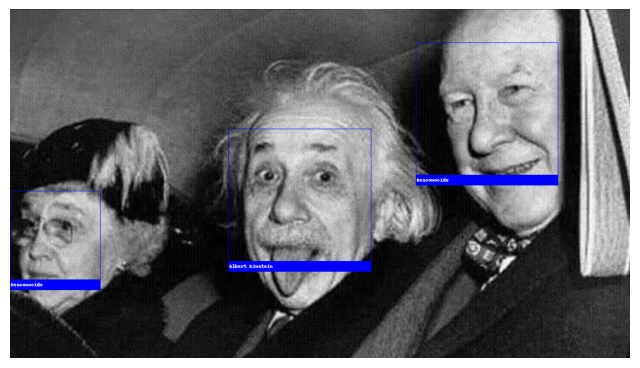

In [10]:
encodings_entrenados = [encoding_einstein]
nombres_rostros      = ["Albert Einstein"]
tres_caras           = face_recognition.load_image_file("20-einstein-arthur-sasse_ea735943_240613232527_1280x720.jpg")
face_locations       = face_recognition.face_locations(tres_caras, model="cnn")
face_encodings       = face_recognition.face_encodings(tres_caras, face_locations)

pil_image = Image.fromarray(tres_caras)
draw      = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(encodings_entrenados, face_encoding)
    name    = "Desconocido"

    face_distances = face_recognition.face_distance(encodings_entrenados, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = nombres_rostros[best_match_index] ## Menor distancia = mejor coincidenncia
        
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 2, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

del draw
plt.figure(figsize=(8, 8))
plt.imshow(pil_image)
plt.axis("off")
plt.show()

## Ahora, la aplicación

Para la aplicación del modelo CNN, vamos a suponer que queremos encontrar a unas personas sospechosas que se vieron en un video grabado en las calles de Colombia.

In [11]:
# Cargar el video
video              = cv2.VideoCapture("piratas.mp4")
fps                = video.get(cv2.CAP_PROP_FPS)
intervalo_segundos = 5                                   # Extraer un frame cada 5 segundos
intervalo_muestras = int(fps * intervalo_segundos)       # Convertir a frames
frame_inicial      = 0

while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break
    if frame_inicial % intervalo_muestras == 0:
        cv2.imshow("Frame", frame)
        print(f"Frame número: {frame_inicial}")
    frame_inicial += 1
    if cv2.waitKey(25) & 0xFF == ord('q'):  # Q frena el código
        break

video.release()
cv2.destroyAllWindows()

Frame número: 0
Frame número: 119
Frame número: 238
Frame número: 357
Frame número: 476
Frame número: 595
Frame número: 714
Frame número: 833
Frame número: 952
Frame número: 1071
Frame número: 1190
Frame número: 1309
Frame número: 1428
Frame número: 1547
Frame número: 1666
Frame número: 1785
Frame número: 1904
Frame número: 2023
Frame número: 2142
Frame número: 2261
Frame número: 2380
Frame número: 2499
Frame número: 2618
Frame número: 2737
Frame número: 2856
Frame número: 2975
Frame número: 3094
Frame número: 3213
Frame número: 3332
Frame número: 3451


In [12]:
int(fps * intervalo_segundos)  

119

## ¿Pero cómo se va a procesar el video?

Para poder procesar el video y detectar los rostros de las personas, es necesario dividir el mismo en múltiples imágenes haciendo particiones según sus fotogramas.

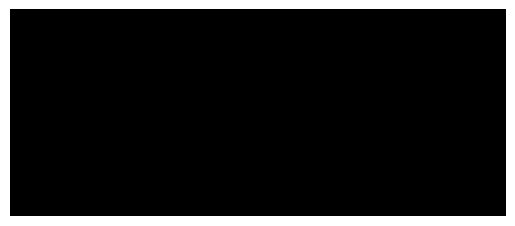

Frame número: 0


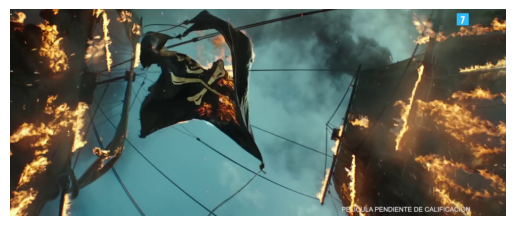

Frame número: 119


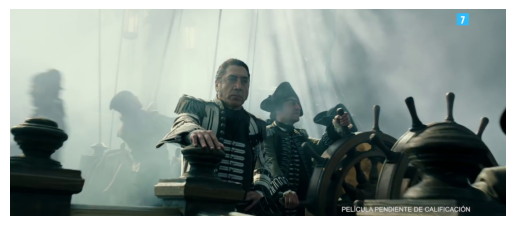

Frame número: 238


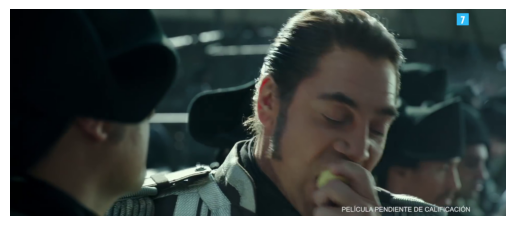

Frame número: 357


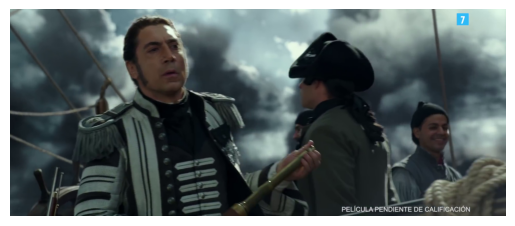

Frame número: 476


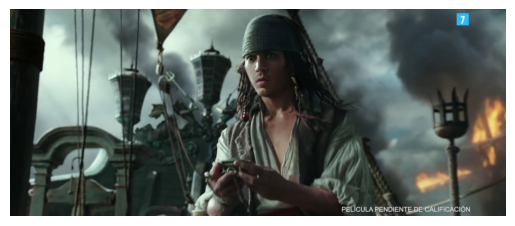

Frame número: 595


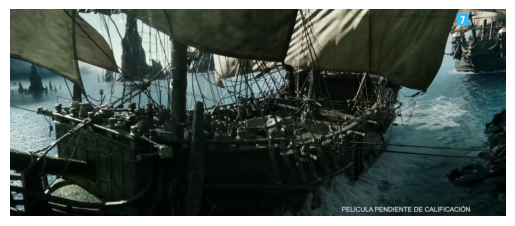

Frame número: 714


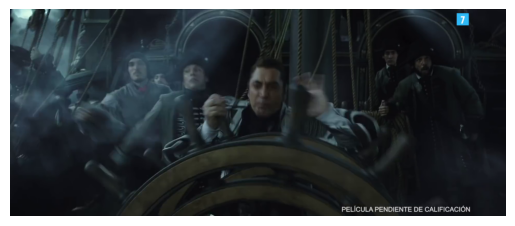

Frame número: 833


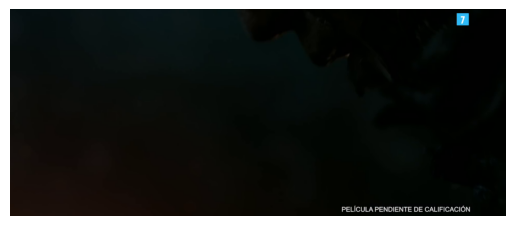

Frame número: 952


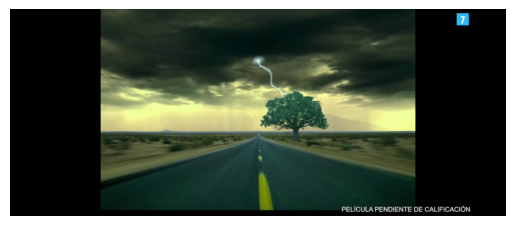

Frame número: 1071


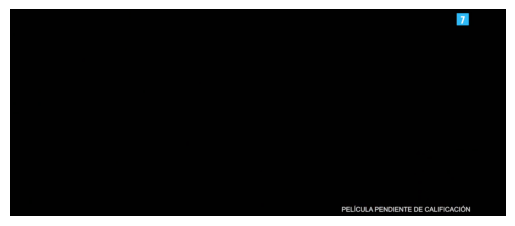

Frame número: 1190


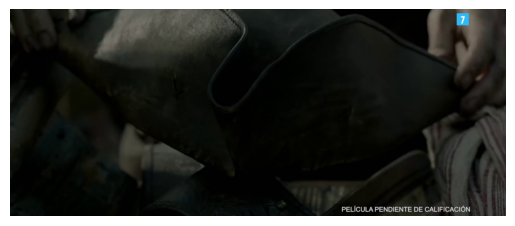

Frame número: 1309


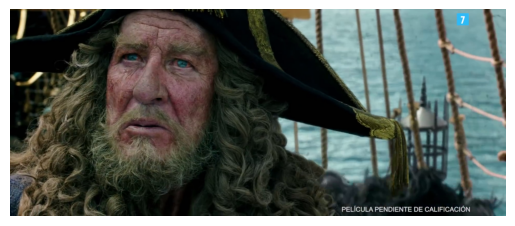

Frame número: 1428


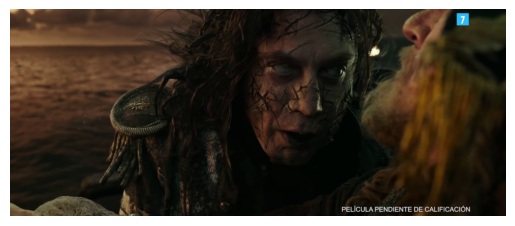

Frame número: 1547


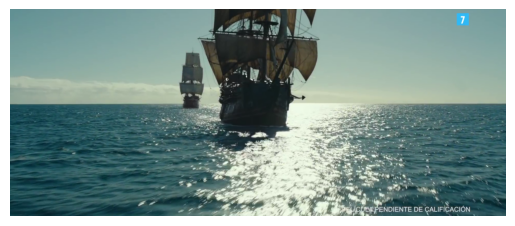

Frame número: 1666


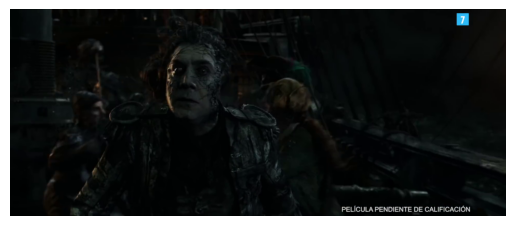

Frame número: 1785


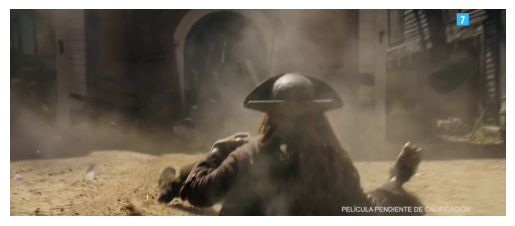

Frame número: 1904


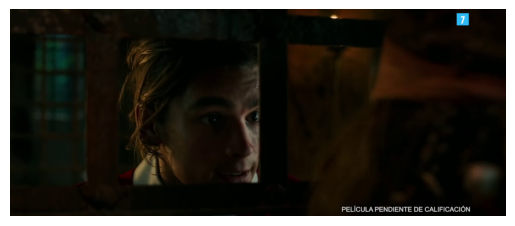

Frame número: 2023


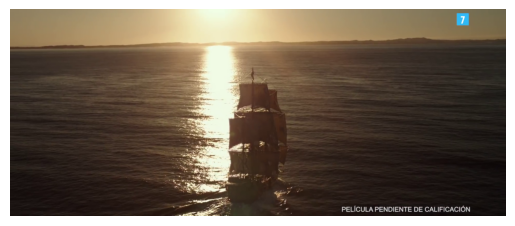

Frame número: 2142


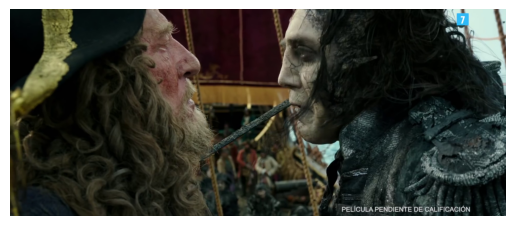

Frame número: 2261


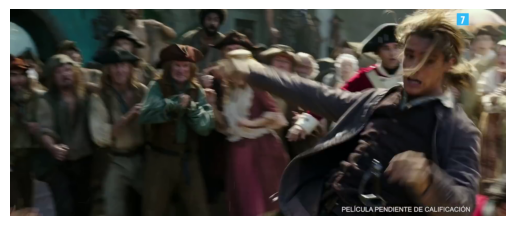

Frame número: 2380


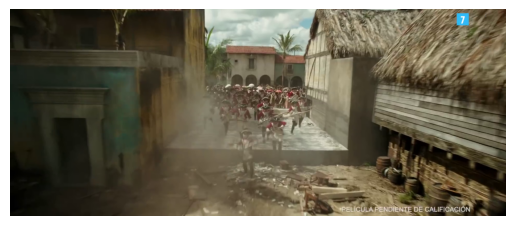

Frame número: 2499


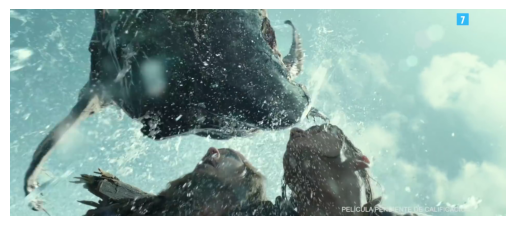

Frame número: 2618


Frame número: 2737


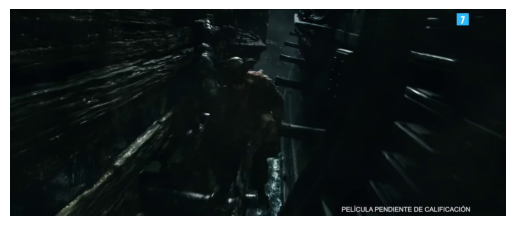

Frame número: 2856


Frame número: 2975


Frame número: 3094


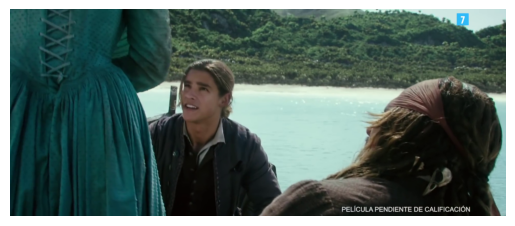

Frame número: 3213


Frame número: 3332


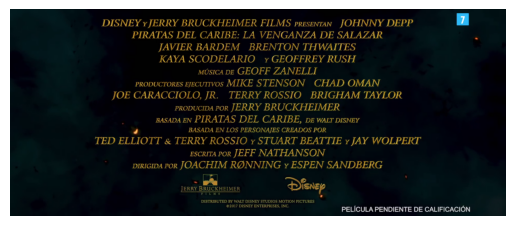

Frame número: 3451


In [14]:
video              = cv2.VideoCapture("piratas.mp4")
fps                = video.get(cv2.CAP_PROP_FPS)
intervalo_muestras = int(fps * intervalo_segundos)   # Cada 119 frames
frame_inicial      = 0 

while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break

    if frame_inicial % intervalo_muestras == 0:             # Solo procesar cada 119 frames                                  
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convertir el frame de BGR a RGB para mostrar con Matplotlib
        plt.imshow(frame_rgb)
        plt.axis("off")
        plt.show()
        print(f"Frame número: {frame_inicial}")
    frame_inicial += 1
video.release()

## Ahora, entrenamos el modelo y probamos si se encuentran coincidencias

Por personas sospechosas, nos referimos a Jhonny Deep, y por calles de Bogotá, nos referimos a el trailer de Piratas del caribe.

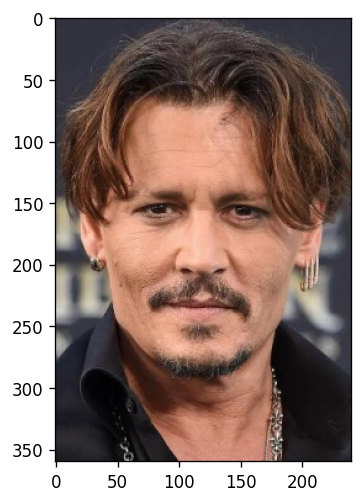

In [16]:
imagen_deep = cv2.imread(r"C:\Users\USUARIO\Downloads\Deep.jpg")
escalado    = 80
ancho       = int(imagen_deep.shape[1] * escalado / 100)
alto        = int(imagen_deep.shape[0] * escalado / 100)
dim         = (ancho, alto)
imagen_deep = cv2.resize(imagen_deep, dim, interpolation = cv2.INTER_AREA)
cv2.imwrite('Deep_scaled.jpg', imagen_deep)

plt.figure(dpi = 120)
plt.imshow(cv2.cvtColor(imagen_deep, cv2.COLOR_BGR2RGB))
plt.show()

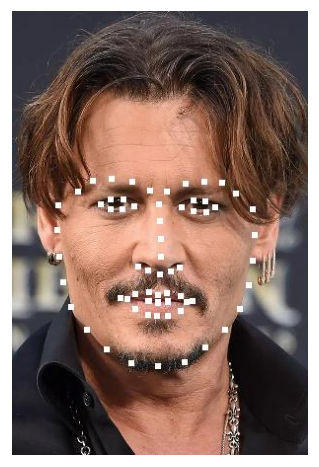

In [18]:
deep_imagen        = face_recognition.load_image_file("Deep.jpg")
deep_face_encoding = face_recognition.face_encodings(deep_imagen)[0]
nombre_archivo     = 'Deep.jpg'
imagen             = io.imread(nombre_archivo)
rostros_detectados = cnn_detector(imagen, 1)

for i, rostro in enumerate(rostros_detectados):
    rect      = rostro.rect 
    landmarks = predictor(imagen, rect)
    for j in range(68):
        imagen[landmarks.part(j).y - 3: landmarks.part(j).y + 3, landmarks.part(j).x - 3: landmarks.part(j).x + 3] = 255

io.imsave('test_cnn.jpg', imagen)
TEST = cv2.imread("test_cnn.jpg")

plt.figure(dpi = 120)
plt.imshow(cv2.cvtColor(TEST, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

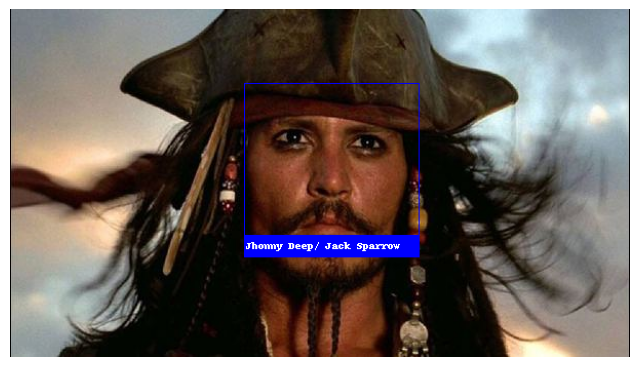

In [19]:
encodings_entrenados = [deep_face_encoding]
nombres_rostros      = ["Jhonny Deep/ Jack Sparrow"]
imagen_prueba        = face_recognition.load_image_file("Pruebadeep.jpg")
face_locations       = face_recognition.face_locations(imagen_prueba, model = "cnn")
face_encodings       = face_recognition.face_encodings(imagen_prueba, face_locations)
pil_image            = Image.fromarray(imagen_prueba)
draw                 = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    coincidencias      = face_recognition.compare_faces(encodings_entrenados, face_encoding)
    desconocidos       = "Desconocido"
    distancias_rostros = face_recognition.face_distance(encodings_entrenados, face_encoding)
    mejor_coincidencia = np.argmin(distancias_rostros)
    if coincidencias[mejor_coincidencia]:
        desconocidos = nombres_rostros[mejor_coincidencia] 
        
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
    text_width, text_height = draw.textsize(desconocidos)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 2, bottom - text_height - 5), desconocidos, fill=(255, 255, 255, 255))

del draw
plt.figure(figsize=(8, 8))
plt.imshow(pil_image)
plt.axis("off")
plt.show()

Jhonny Deep/ Jack Sparrow detectado en el minuto 0:24


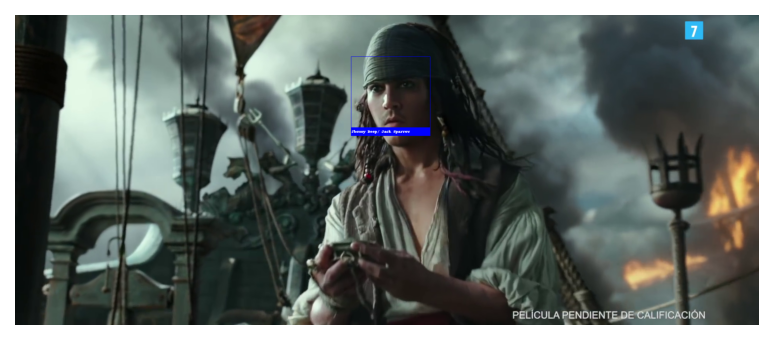

Jhonny Deep/ Jack Sparrow detectado en el minuto 2:18


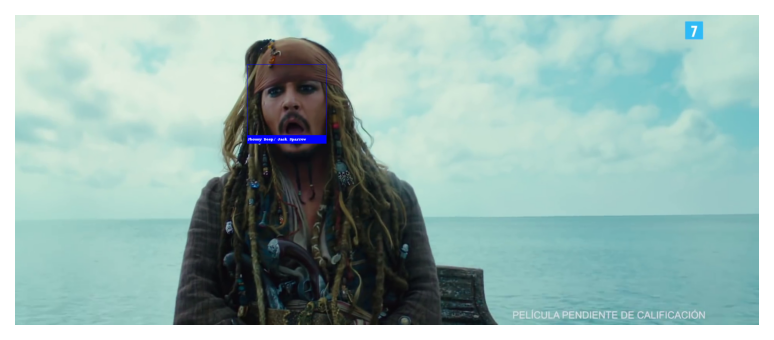

No se pudo leer el frame. Fin del video.
Fin del procesamiento del video.


In [23]:
imagen_objetivo      = face_recognition.load_image_file("Deep.jpg")
deep_face_encoding   = face_recognition.face_encodings(imagen_objetivo)[0]
target_name          = "Jhonny Deep/ Jack Sparrow"
video                = cv2.VideoCapture("piratas.mp4")
fps                  = video.get(cv2.CAP_PROP_FPS)
intervalo_muestras   = int(fps * intervalo_segundos)   # Cada 119 frames
frame_inicial        = 0 
total_frames         = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

while video.isOpened():
    ret, frame = video.read()
    if not ret:
        print("No se pudo leer el frame. Fin del video.")
        break
    if frame_inicial >= total_frames:
        print("Se ha procesado todo el video.")
        break
    if frame_inicial % intervalo_muestras == 0:
        frame_rgb      = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        face_locations = face_recognition.face_locations(frame_rgb, model="cnn")
        face_encodings = face_recognition.face_encodings(frame_rgb, face_locations)
        coincidencia   = False
        pil_image      = Image.fromarray(frame_rgb)
        draw           = ImageDraw.Draw(pil_image)
        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            coincidencias = face_recognition.compare_faces([deep_face_encoding], face_encoding)
            if True in coincidencias:
                coincidencia = True
                tiempo_segundos = frame_inicial / fps
                minutos         = int(tiempo_segundos // 60)
                segundos        = int(tiempo_segundos % 60)
                
                print(f"{target_name} detectado en el minuto {minutos}:{segundos:02d}")

                draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
                text_width, text_height = draw.textsize(target_name)
                draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
                draw.text((left + 2, bottom - text_height - 5), target_name, fill=(255, 255, 255, 255))
        if coincidencia:
            plt.figure(dpi=150)
            plt.imshow(pil_image)
            plt.axis("off")
            plt.show()
    frame_inicial += 1
video.release()
print("Fin del procesamiento del video.")